# Diagnosing the data issues:

Imports: 

In [1]:
import pandas as pd 
% matplotlib inline
from matplotlib import pyplot as plt 
from IPython.display import Image

Couple of quick util functions

In [2]:
def plot_standard_deviations(data, label):
    """ Makes a pretty plot of a histogram with the standard deviations """
    ax = data.hist(bins=40, figsize=(16,4))

    ax.axvspan(data.mean() - data.std(), 
               data.mean() + data.std(), 
               alpha=0.4, 
               color='green')

    ax.axvspan(data.mean() - 2*data.std(), 
               data.mean() + 2*data.std(), 
               alpha=0.3, 
               color='yellow')


    ax.axvspan(data.mean() - 3*data.std(), 
               data.mean() + 3*data.std(), 
               alpha=0.2, 
               color='red')
    
    plt.xlabel(label)
    plt.ylabel('Count')
    plt.ylabel('Number of observations')
    

def print_analysis(series):
    """ Prints how much data is in each standard deviation """
    for nr in range(1, 4):
        
        upper_limit = series.mean() + (nr * series.std())
        lower_limit = series.mean() - (nr * series.std())
        
        in_range = (series < upper_limit) & (series > lower_limit)
        percent_in_range = in_range.sum() / len(series)
        
        print('%0.5f%% of the dataset is under %0.0f SDs from the mean (%0.0f)' %(
                percent_in_range*100, nr, upper_limit))

# The data you'll be exloring:

Loading the data:

In [3]:
data = pd.read_csv('data/all_data.csv', index_col=0)

Get a quick view: 

In [4]:
data.head(10)

,age,height,gender
CFLOXRHMDR,88.0,163.0,female
FXLJSNLSOG,29.0,158.0,female
FWDIVJKGOI,42.0,159.0,female
YWEBKQWHRE,25.0,179.0,male
YPUQAPSOYJ,32.0,169.0,male
YPUQAPSOYJ,32.0,169.0,male
YPUQAPSOYJ,32.0,169.0,male
YPUQAPSOYJ,32.0,169.0,male
SSZQEGTLNK,NaN,162.0,male
PRFEFXNGWN,36.0,166.0,female


## Duplicated data: 

We seem to have a problem with some duplicated data. We can use Pandas' [**`duplicated`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.duplicated.html) to diagnose this: 

In [5]:
q

,age,height,gender
YPUQAPSOYJ,32.0,169.0,male
YPUQAPSOYJ,32.0,169.0,male
YPUQAPSOYJ,32.0,169.0,male
YPUQAPSOYJ,32.0,169.0,male
WTHLQFCQWG,21.0,156.0,female
WVTLKKOGLC,18.0,168.0,female
XUAJJPLVOI,18.0,168.0,female
GRDIRFSNWS,25.0,155.0,male
TRMMGYEEPC,21.0,156.0,female
ZNLRYQHPXJ,25.0,155.0,male


Sometimes the duplication is legitimate. 

We might want to say that only when the index is duplicated do we consider it a problem, and use [**`index.duplicated`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Index.duplicated.html)

In [6]:
data[data.index.duplicated(keep=False)]

,age,height,gender
YPUQAPSOYJ,32.0,169.0,male
YPUQAPSOYJ,32.0,169.0,male
YPUQAPSOYJ,32.0,169.0,male
YPUQAPSOYJ,32.0,169.0,male


## Missing data: 

In [7]:
# shorthand names to reach these columns faster:
heights = data['height']
ages = data['age']
gender = data['gender']

#### How much missing data do we have for heights? 

[**`.isnull()`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.isnull.html) will give you a Series of True of False, depending on whether the entry is missing:  

In [8]:
missing_height = heights.isnull()

In [9]:
missing_height.head()

CFLOXRHMDR    False
FXLJSNLSOG    False
FWDIVJKGOI    False
YWEBKQWHRE    False
YPUQAPSOYJ    False
Name: height, dtype: bool

We can sum these, as in Python3 True [is guaranteed](http://stackoverflow.com/questions/2764017/is-false-0-and-true-1-in-python-an-implementation-detail-or-is-it-guarante) to evaluate to 1, and False to 0

In [10]:
missing_height.sum()

4

Let's see the rows where there is missing data on height: 

In [11]:
data[missing_height]

,age,height,gender
CWCFROPRFE,22.0,NaN,male
EORSIPDIHA,21.0,NaN,MALE
NGJOHICWSY,41.0,NaN,male
LNLAPFIJEQ,37.0,NaN,male


##### How about age? 

In [12]:
missing_ages = ages.isnull()

In [13]:
data[missing_ages]

,age,height,gender
SSZQEGTLNK,NaN,162.0,male
TJQPFEFVVH,NaN,182.0,NaN
PYHWLDVICX,NaN,181.0,female
MLRPKGKACD,NaN,185.0,male
SGMGUJEBNC,NaN,173.0,MALE
YZDOYNOXAF,NaN,144.0,female
UAOAMGUQSX,NaN,144.0,male
JFVZOEGUUA,NaN,208.0,female
VYAQBLJKXJ,NaN,165.0,male


##### And gender? 

Gender is [categorical](http://www.stat.yale.edu/Courses/1997-98/101/catdat.htm) (you can think of it as "non numerical" for now), so we can safely take a [**`value_counts`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html) to see all the uniques, and how many observations there were of each. 

Passing `dropna=False` ensures we also see the missing data (pandas drops them with the default settings)

In [14]:
gender.value_counts(dropna=False)

female    113
male       69
MALE        9
NaN         9
Name: gender, dtype: int64

However, we can also use the same technique we were using with the numerical data: 

In [15]:
missing_gender = data['gender'].isnull()
data[missing_gender]

,age,height,gender
TJQPFEFVVH,NaN,182.0,NaN
QXUGUHCOPT,101.0,196.0,NaN
LKEHZFGGTS,49.0,177.0,NaN
EBTRPEDHJS,43.0,147.0,NaN
BDFQWIHWCH,27.0,167.0,NaN
NUCCGRJLXN,20.0,159.0,NaN
GQSNBZIGBL,27.0,197.0,NaN
KWJJMPVSCP,24.0,189.0,NaN
LMZUTCGFYT,21.0,153.0,NaN


### Data entry problems: 

However, we have another problem. We seem to have both `male` and `MALE`. Let's do a quick [**`bar chart`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.bar.html) to confirm: 

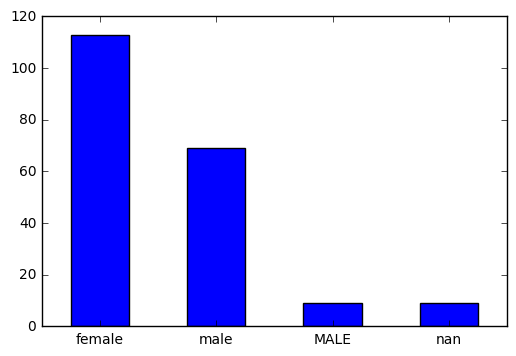

In [16]:
gender.value_counts(dropna=False).plot(kind='bar', rot=0)

## Outliers: 

#### What is the distribution of the heights? 

For a first quick pass, we can use [**`describe`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html) to get an idea of the data

In [17]:
heights.describe()

count    196.000000
mean     168.709184
std       18.620422
min       65.000000
25%      158.750000
50%      168.000000
75%      179.250000
max      252.000000
Name: height, dtype: float64

We can gain a few conclusions here. The mean height is 168, which we assume is in centimeters. The min is 65, and the max 252. 

Let's make a histogram to get a visual idea, using [**`hist`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.hist.html)

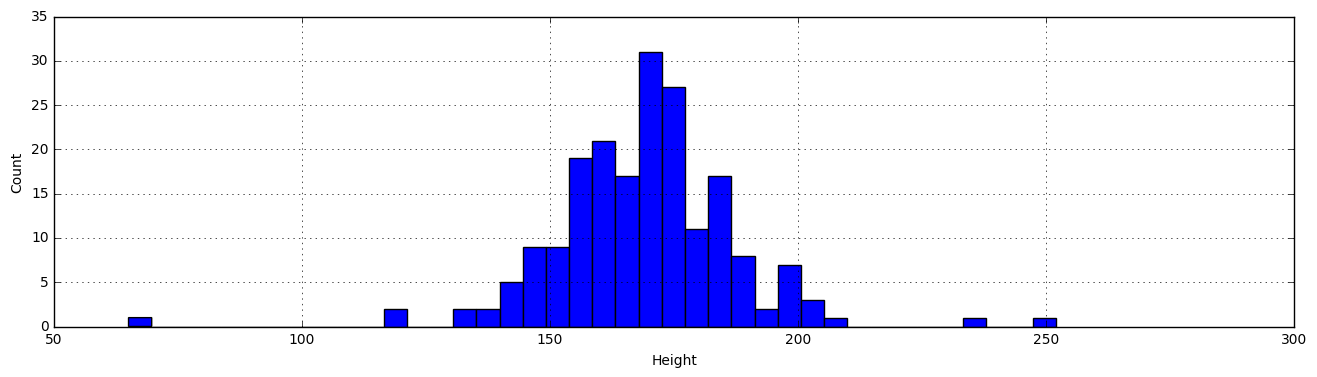

In [18]:
heights.hist(bins=40, figsize=(16,4))
plt.xlabel('Height')
plt.ylabel('Count')

As you've probably learned in school, most of the data is within 3 standard deviations, when the distribution is normal: 

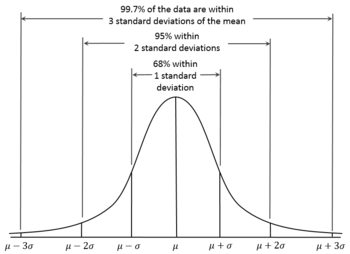

In [19]:
Image('https://upload.wikimedia.org/wikipedia/commons/thumb/a/a9/Empirical_Rule.PNG/350px-Empirical_Rule.PNG')

How does that look on our data?

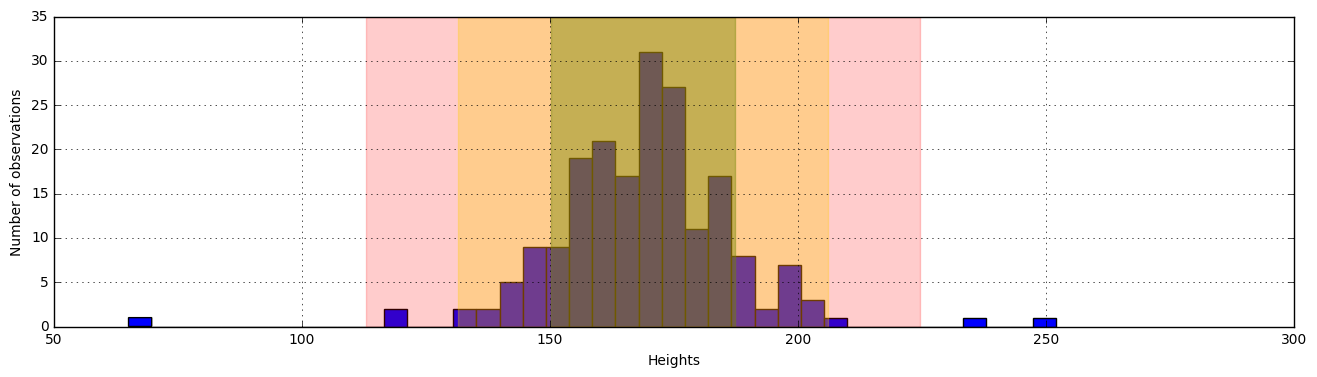

In [20]:
plot_standard_deviations(heights, 'Heights')

In [21]:
print_analysis(heights)

75.50000% of the dataset is under 1 SDs from the mean (187)
94.50000% of the dataset is under 2 SDs from the mean (206)
96.50000% of the dataset is under 3 SDs from the mean (225)


Not too bad, and we've clearly spotted a few outside our ranges. Let's take a closer look, by using masks:

### Who is outside of 2 standard deviations? 

Under: 

In [22]:
under_limit = heights < (heights.mean() - 2 * heights.std())
heights[under_limit]

QMAARXTCCQ     65.0
VYIYVAVHOY    119.0
RPXMEBIHPC    119.0
WTWLZNEVPA    131.0
Name: height, dtype: float64

Over: 

In [23]:
over_limit = heights > (heights.mean() + 2 * heights.std())
heights[over_limit]

ZUMSOSOZUX    252.0
XTGTMAUIMJ    235.0
JFVZOEGUUA    208.0
Name: height, dtype: float64

### And outside 3 standard deviations?

Under: 

In [24]:
under_limit = heights < (heights.mean() - 3 * heights.std())
heights[under_limit]

QMAARXTCCQ    65.0
Name: height, dtype: float64

Over: 

In [25]:
over_limit = heights > (heights.mean() + 3 * heights.std())
heights[over_limit]

ZUMSOSOZUX    252.0
XTGTMAUIMJ    235.0
Name: height, dtype: float64

### How about the ages? 

As before, let's start with a quick and dirty [**`describe`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html)

In [26]:
ages.describe()

count    1.910000e+02
mean     1.570713e+06
std      2.170724e+07
min      1.000000e+00
25%      2.150000e+01
50%      2.700000e+01
75%      3.600000e+01
max      3.000000e+08
Name: age, dtype: float64

We seem to have some value to the power of 8, which indicates that we have some data problems with outliers. We can also call that value directly by calling [**`max`**](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.max.html)

In [27]:
ages.max()

300000000.0

Let's do a histogram again:

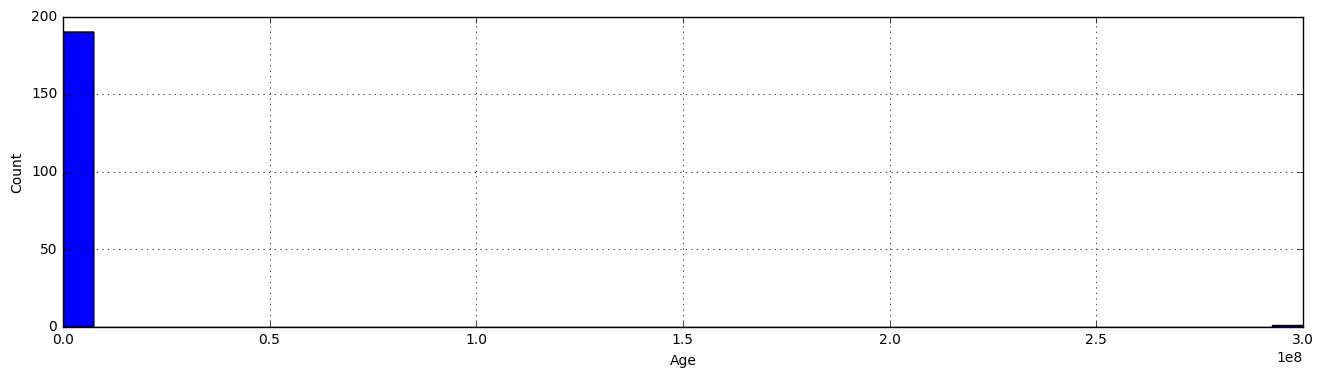

In [28]:
ages.hist(bins=40, figsize=(16,4))
plt.xlabel('Age')
plt.ylabel('Count')

Well that does not seem as useful. What would our analysis of standard deviations give us? 

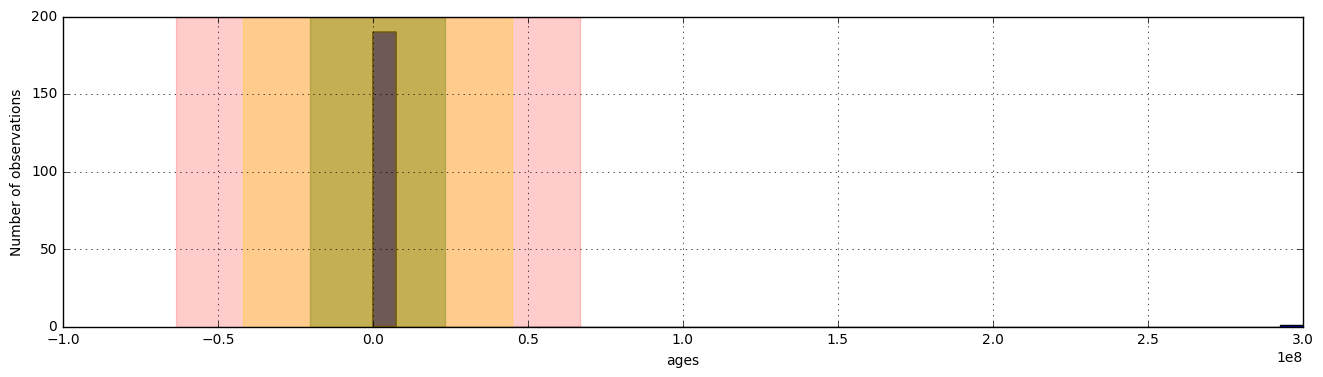

In [29]:
plot_standard_deviations(ages, 'ages')

In [30]:
print_analysis(ages)

95.00000% of the dataset is under 1 SDs from the mean (23277948)
95.00000% of the dataset is under 2 SDs from the mean (44985184)
95.00000% of the dataset is under 3 SDs from the mean (66692420)


The problem we're having is that Using the Standard Deviation makes [assumptions about the distribution](http://stats.stackexchange.com/questions/26797/finding-outliers-without-assuming-normal-distribution). 

### Finding outliers in non-normally distributed data: 

So we're going to have to be clever about this. Let's start by using the fact that we know what ages are supposed to look like. 

Apparently [this lady](https://en.wikipedia.org/wiki/Jeanne_Calment) is the oldest woman in the world, so we'll use her as an upper bound: 

In [31]:
regular_ages = (ages >= 0) & (ages < 122)

In [32]:
ages[regular_ages].describe()

count    189.000000
mean      31.158730
std       16.591981
min        1.000000
25%       21.000000
50%       27.000000
75%       36.000000
max      109.000000
Name: age, dtype: float64

Interesting. So what about our non-regular ages? 

Placing a tilde (`~`) behind the masking condition will invert it: 

In [33]:
ages[~regular_ages].describe()

count    2.000000e+00
mean     1.500001e+08
std      2.121319e+08
min      2.240000e+02
25%      7.500017e+07
50%      1.500001e+08
75%      2.250001e+08
max      3.000000e+08
Name: age, dtype: float64

So there are only 2 (from reading `count`) outliers that are outside our range. 

We can see the ages that are not in our "regular" range directly, by looking at the mask (will also bring some missing data with it)

In [34]:
ages[~regular_ages]

SSZQEGTLNK            NaN
TJQPFEFVVH            NaN
PYHWLDVICX            NaN
MLRPKGKACD            NaN
TSHRBGFOJU    300000000.0
SGMGUJEBNC            NaN
YZDOYNOXAF            NaN
SQYVEHAWSW          224.0
UAOAMGUQSX            NaN
JFVZOEGUUA            NaN
VYAQBLJKXJ            NaN
Name: age, dtype: float64

### What if we wanted to find this out programatically? 

There isn't a panacea for detecting all outliers, but there are a number of tricks that can help us. 

What if we used [quantiles](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.quantile.html)? 

As a reminder, a quantiles are used to indicated the value below which a given percentage of observations in a group of observations fall.

In other words: 
* 50% of the data is under quantile .5
* 99% of the data is under quantile .99
* etc

Let's find a really extreme value. What is the quantile .995 of our data?

In [35]:
extreme_value = .995
ages.quantile(extreme_value)

15000212.800003411

What is the data under that quantile? 

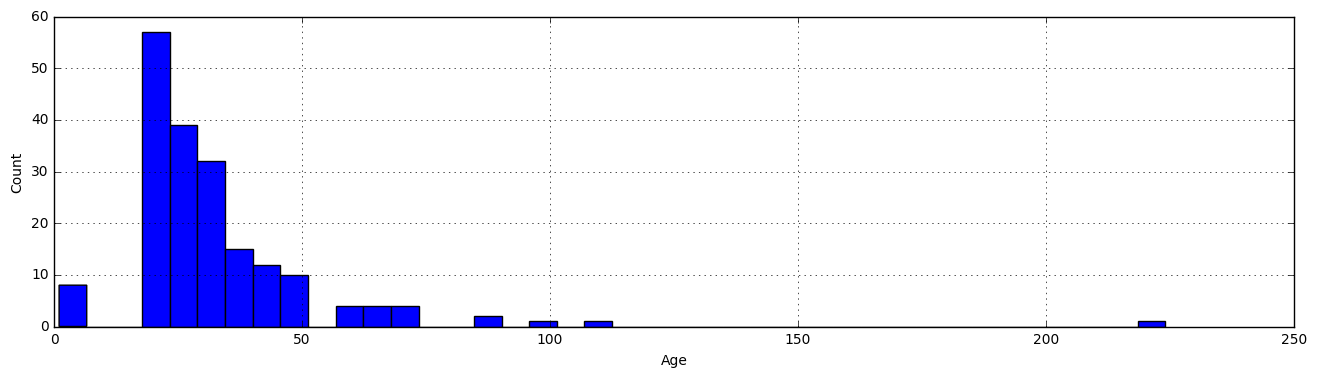

In [36]:
extreme_value = .995
under_extreme_value = ages < ages.quantile(extreme_value)

ages[under_extreme_value].hist(bins=40, figsize=(16,4))
plt.xlabel('Age')
plt.ylabel('Count')

Well, this looks a lot more usable. 

We can now control this threshold until we are happy with the results: 

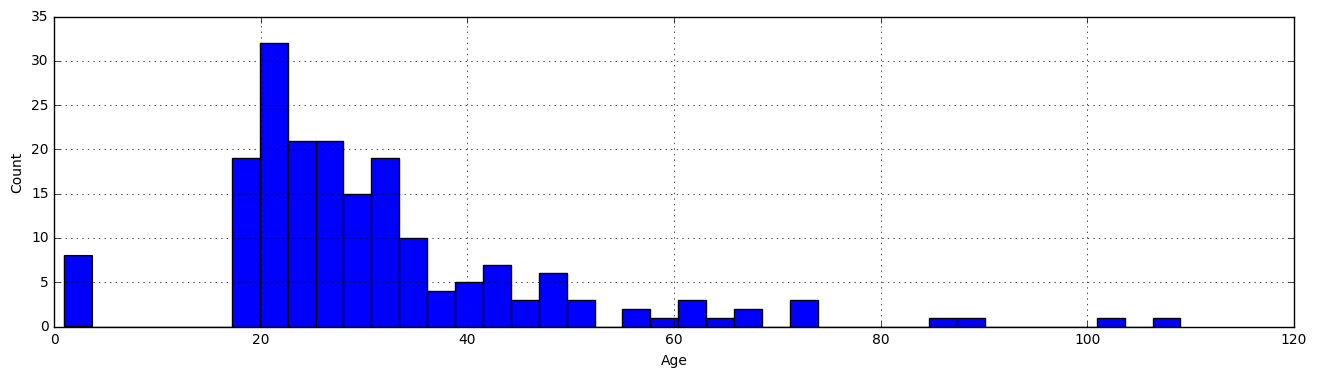

In [37]:
extreme_value = .99
under_extreme_value = ages < ages.quantile(extreme_value)

ages[under_extreme_value].hist(bins=40, figsize=(16,4))
plt.xlabel('Age')
plt.ylabel('Count')

One way to express this is: 
"`what would my data by if I rejected the 1% more extreme cases?`"

#### Context and human intuition: 

We still seem, by visual scanning, to have some separate data on the lower levels. What do those look like?

In [38]:
ages[ages<10]

IIVXDNOAIV    1.0
PFCTYIBBNQ    1.0
YHLAPUOBBQ    1.0
YXTASLZIQE    1.0
SLCKXVRTWM    1.0
CNHABFBVXN    1.0
OLHYEOLRBH    1.0
GMVBEAWDQF    1.0
Name: age, dtype: float64

There seem to be a group of people who are 1 year old. Here, whether they are outliers or normal data depends on the context. Is this a dataset of... 
* people who checked into a hospital? (probably fine) 
* the age at which a population got it's driving license (probably an outlier) 

# What to do about these outliers: 

In [39]:
ages[~under_extreme_value]

SSZQEGTLNK            NaN
TJQPFEFVVH            NaN
PYHWLDVICX            NaN
MLRPKGKACD            NaN
TSHRBGFOJU    300000000.0
SGMGUJEBNC            NaN
YZDOYNOXAF            NaN
SQYVEHAWSW          224.0
UAOAMGUQSX            NaN
JFVZOEGUUA            NaN
VYAQBLJKXJ            NaN
Name: age, dtype: float64

If we remove this data, we'll get rid of:
* some missing data
* a 224 year old 
* a 300 million year old. 

# Bonus question:

Regarding this really old outlier, if this person existed, what would they have been up to?

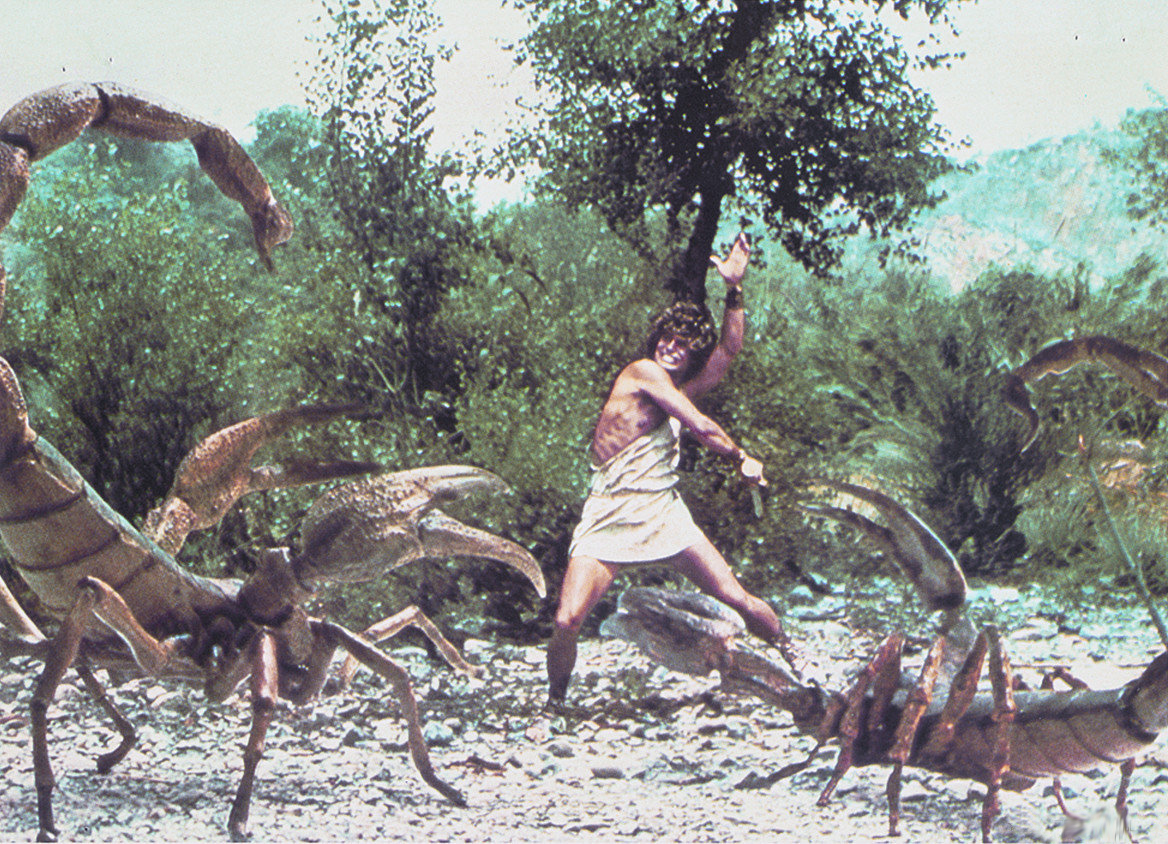

In [40]:
Image('http://3.bp.blogspot.com/-N-Povgzi4Po/T8nqv-rHXjI/AAAAAAAAAxo/KH7bdFKphK4/s1600/BE4EF50CE1.jpeg')

#### Answer to bonus question: 
##### Fighting off [70 cm scorpions](https://en.wikipedia.org/wiki/Pulmonoscorpius). 